Here's the content formatted in Markdown:

# 1. Installing Required Libraries

Before diving into data analysis, it's essential to install all necessary Python libraries. This includes:

* **Pandas**: For data manipulation and analysis
* **FuzzyWuzzy & RapidFuzz**: For fuzzy string matching
* **Dask**: For parallel computing with large datasets
* **PySpark**: For large-scale data processing using Apache Spark

We'll use pip to install these libraries directly within the Jupyter Notebook.

In [1]:
pip install pandas fuzzywuzzy rapidfuzz dask pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.6 MB/s eta 0:00:00:00:01
  Created wheel for pyspark: filename=pyspark-3.5.4-py2.py3-none-any.whl size=317849765 sha256=fa36591383d19e31f4d1e5572a915002e35dd6aaa7b2f4ae7d966b23fba1d101
  Stored in directory: /root/.cache/pip/wheels/d9/1c/98/31e395a42d1735d18d42124971ecbbade844b50bb9845b6f4a
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


Here's the content formatted in Markdown:

# 2. Importing Libraries and Sampling Data with PySpark

In this cell, we perform the following tasks:

## Import Necessary Libraries

* **Pandas**: For data manipulation
* **Random**: For random number generation
* **PySpark**: For efficient large-scale data processing

## Initialize Spark Session
Establish a Spark session to leverage PySpark's capabilities.

## Define File Paths and Sampling Parameters

* **input_file**: Path to the input CSV containing MTA Subway Hourly Ridership data
* **output_file**: Path where the sampled data will be saved
* **sample_fraction**: Fraction of data to sample (1% in this case)
* **random_seed**: Seed for reproducibility

## Sampling the Data

* Read the CSV using PySpark
* Sample the data based on the specified fraction
* Save the sampled data to a new CSV file

In [2]:
import pandas as pd
import random


input_file = "/kaggle/input/mta-combined/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"  
output_file = "MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"

sample_fraction = 0.01  
chunksize = 1000000  
random_seed = 42  


try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  
           
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv


In [3]:
import pandas as pd
import random

input_file = "/kaggle/input/mta-combined/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"  # Replace with your file path
output_file = "MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"

# Parameters
sample_fraction = 0.01  
chunksize = 1000000  
random_seed = 42  


try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)   
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv


In [4]:
import pandas as pd
import os

def load_csvs_and_sample(csv_list, size_limit_gb=1.5, sample_fraction=0.05):
    
    size_limit_bytes = size_limit_gb * (1024 ** 3)   
    dataframes = {}    
    
    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"File {csv_path} does not exist.")
            continue
            
          
        file_size_bytes = os.path.getsize(csv_path)
        print(f"Processing {os.path.basename(csv_path)}: Size = {file_size_bytes / (1024 ** 3):.2f} GB")
        
        
        if file_size_bytes > size_limit_bytes:
            print(f"{os.path.basename(csv_path)} exceeds size limit. Loading and sampling...")
            df = pd.read_csv(csv_path).sample(frac=sample_fraction, random_state=42)
        else:
            print(f"{os.path.basename(csv_path)} is within size limit. Loading...")
            df = pd.read_csv(csv_path)
            
          
        dataframes[os.path.splitext(os.path.basename(csv_path))[0]] = df
        
    return dataframes

csv_files = [
    "/kaggle/input/mta-combined/MTA_Customer_Feedback_Data__2014-2019.csv",
    "/kaggle/input/mta-combined/MTA_Daily_Ridership_Data__Beginning_2020.csv",
    "/kaggle/input/mta-combined/MTA_Key_Performance_Indicators__2008-2021.csv",
    "/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv",
    "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv",
    "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Major_Incidents__Beginning_2020.csv",
    "/kaggle/working/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Turnstile_Usage_Data__2022.csv",
    "/kaggle/input/mta-combined/MTA_Subway_and_Bus_Lost_Time_Accidents__Beginning_2021.csv"
]


dataframes = load_csvs_and_sample(csv_files)

Processing MTA_Customer_Feedback_Data__2014-2019.csv: Size = 0.05 GB
MTA_Customer_Feedback_Data__2014-2019.csv is within size limit. Loading...
Processing MTA_Daily_Ridership_Data__Beginning_2020.csv: Size = 0.00 GB
MTA_Daily_Ridership_Data__Beginning_2020.csv is within size limit. Loading...
Processing MTA_Key_Performance_Indicators__2008-2021.csv: Size = 0.00 GB
MTA_Key_Performance_Indicators__2008-2021.csv is within size limit. Loading...
Processing MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv: Size = 0.00 GB
MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv is within size limit. Loading...
Processing MTA_Service_Alerts__Beginning_April_2020.csv: Size = 0.09 GB
MTA_Service_Alerts__Beginning_April_2020.csv is within size limit. Loading...


/tmp/ipykernel_30/583648669.py:34: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Processing MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv: Size = 0.00 GB
MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv is within size limit. Loading...
Processing MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv: Size = 0.14 GB
MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv is within size limit. Loading...
Processing MTA_Subway_Major_Incidents__Beginning_2020.csv: Size = 0.00 GB
MTA_Subway_Major_Incidents__Beginning_2020.csv is within size limit. Loading...
Processing MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv: Size = 0.14 GB
MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv is within size limit. Loading...
Processing MTA_Subway_Stations.csv: Size = 0.00 GB
MTA_Subway_Stations.csv is within size limit. Loading...
Processing MTA_Subway_Stations_and_Complexes.csv: Size = 0.00 GB
MTA_Subway_Stations_and_Complexes.csv is within size limit. Loading...
Processing MTA_Subway_Turnstile_Usage_Data__2022.csv: Size = 0.71 GB
MTA_Subway_

  MTA Ridership Analysis Setup

   Library Imports and Initial Setup
This notebook analyzes MTA (Metropolitan Transportation Authority) ridership data using PySpark, Pandas, and Prophet for time series forecasting. We'll begin by importing necessary libraries and setting up our environment.

    Libraries Used:
- PySpark SQL: For distributed data processing
- Pandas: For data manipulation and analysis
- NumPy: For numerical operations
- Matplotlib: For data visualization
- Prophet: For time series forecasting

    Data Loading
We load three distinct MTA datasets:
1. Daily ridership data (from 2020)
2. Monthly ridership data (from January 2008)
3. Subway hourly ridership data (from July 2020)

The data is initially loaded into Pandas DataFrames through CSV files stored in a Kaggle environment.

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/20 22:09:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22:09:08 - cmdstanpy - INFO - Chain [1] start processing
22:09:08 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, c

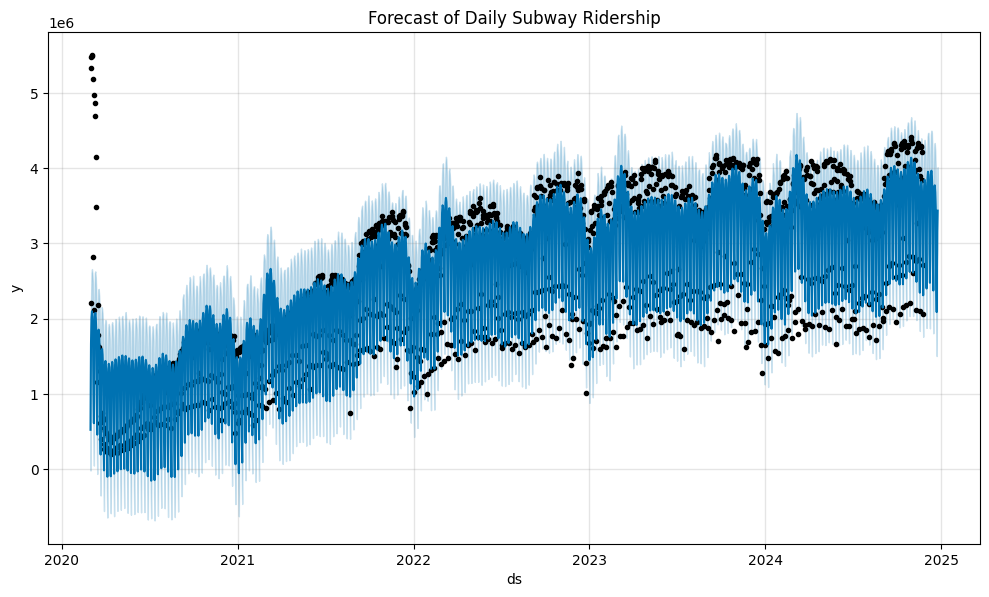

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, sum as spark_sum, month, year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import os


spark = SparkSession.builder.appName("MTA Ridership Analysis").getOrCreate()

dataframes = {
    "MTA_Daily_Ridership_Data__Beginning_2020": pd.read_csv("/kaggle/input/mta-combined/MTA_Daily_Ridership_Data__Beginning_2020.csv"),
    "MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008": pd.read_csv("/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv"),
    "MTA_Subway_Hourly_Ridership__Beginning_July_2020": pd.read_csv("/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv")
}

daily_df = dataframes.get("MTA_Daily_Ridership_Data__Beginning_2020", None)
monthly_df = dataframes.get("MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008", None)
hourly_df = dataframes.get("MTA_Subway_Hourly_Ridership__Beginning_July_2020", None)


daily_df["Date"] = pd.to_datetime(daily_df["Date"], errors='coerce')
daily_df = daily_df.set_index("Date").sort_index()

if "Subways: Total Estimated Ridership" in daily_df.columns:
    daily_ridership = daily_df["Subways: Total Estimated Ridership"].to_frame(name="daily_subway_ridership")
else:
    raise ValueError("Expected column 'Subways: Total Estimated Ridership' not found in daily_df.")


if "Month" in monthly_df.columns:
    monthly_df["Month"] = pd.to_datetime(monthly_df["Month"], errors='coerce')
else:
    raise ValueError("Expected column 'Month' not found in monthly_df.")

monthly_df = monthly_df.set_index("Month").sort_index()

if "Ridership" in monthly_df.columns:
    monthly_df = monthly_df.rename(columns={"Ridership": "monthly_total_ridership"})
else:
    raise ValueError("Expected column 'Ridership' not found in monthly_df.")

if "Agency" in monthly_df.columns:
    monthly_df = monthly_df.drop(columns=["Agency"], errors='ignore')

monthly_df = monthly_df[~monthly_df.index.duplicated(keep='first')]

if "monthly_total_ridership" in monthly_df.columns:
    monthly_df["days_in_month"] = monthly_df.index.days_in_month
    monthly_df["daily_approx_ridership"] = monthly_df["monthly_total_ridership"] / monthly_df["days_in_month"]
else:
    raise ValueError("Expected 'monthly_total_ridership' was not created successfully.")

monthly_daily = monthly_df[["daily_approx_ridership"]].resample("D").ffill()

if "transit_timestamp" in hourly_df.columns:
    hourly_df["transit_timestamp"] = pd.to_datetime(hourly_df["transit_timestamp"], errors='coerce')
    hourly_df = hourly_df.set_index("transit_timestamp").sort_index()
else:
    raise ValueError("Expected column 'transit_timestamp' not found in hourly_df.")

if "ridership" in hourly_df.columns:
    hourly_daily = hourly_df.resample("D")["ridership"].sum().to_frame("hourly_aggregated_daily_ridership")
else:
    raise ValueError("Expected column 'ridership' not found in hourly_df.")

combined = daily_ridership.join(hourly_daily, how="outer")
combined = combined.join(monthly_daily, how="outer")

start_date = max(combined.index.min(), pd.to_datetime("2020-01-01"))
end_date = combined.index.max()
combined = combined.loc[start_date:end_date]

combined.ffill(inplace=True)


prophet_df = combined.reset_index().rename(columns={"index": "ds", "daily_subway_ridership": "y"})
prophet_df = prophet_df[["ds", "y"]].dropna()

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Forecast of Daily Subway Ridership")
plt.show()

spark.stop()

# Importing Libraries and Sampling Data with PySpark

In this cell, we perform the following tasks:

## Import Necessary Libraries

* **Pandas**: For data manipulation
* **Random**: For random number generation
* **PySpark**: For efficient large-scale data processing

## Initialize Spark Session
Establish a Spark session to leverage PySpark's capabilities.

## Define File Paths and Sampling Parameters

* **input_file**: Path to the input CSV containing MTA Subway Hourly Ridership data
* **output_file**: Path where the sampled data will be saved
* **sample_fraction**: Fraction of data to sample (1% in this case)
* **random_seed**: Seed for reproducibility

## Sampling the Data

* Read the CSV using PySpark
* Sample the data based on the specified fraction
* Save the sampled data to a new CSV file

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import logging

sns.set(style="whitegrid")
%matplotlib inline

In [7]:
def load_csvs_and_sample(csv_list, size_limit_gb=1.5, sample_fraction=0.05):
    """
    Load CSV files into dataframes and sample large files to bring their size below the specified limit.

    Args:
    - csv_list (list): List of CSV file paths to load.
    - size_limit_gb (float): Size limit in GB for each CSV file.
    - sample_fraction (float): Fraction to sample for files exceeding the size limit.

    Returns:
    - dict: Dictionary containing dataframe names (keys) and dataframes (values).
    """
    size_limit_bytes = size_limit_gb * (1024 ** 3)  
    dataframes = {} 

    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"File {csv_path} does not exist.")
            continue

        file_size_bytes = os.path.getsize(csv_path)

        print(f"Processing {os.path.basename(csv_path)}: Size = {file_size_bytes / (1024 ** 3):.2f} GB")


        if file_size_bytes > size_limit_bytes:
            print(f"{os.path.basename(csv_path)} exceeds size limit. Loading and sampling...")
            df = pd.read_csv(csv_path).sample(frac=sample_fraction, random_state=42)
        else:
            print(f"{os.path.basename(csv_path)} is within size limit. Loading...")
            df = pd.read_csv(csv_path)

        dataframes[os.path.splitext(os.path.basename(csv_path))[0]] = df

    return dataframes
    
csv_files = [
    "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv",
    "/kaggle/working/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv",
    "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv"
]

dataframes = load_csvs_and_sample(csv_files)

for name, df in dataframes.items():
    print(f"{name}: {df.shape}")

Processing MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv: Size = 0.14 GB
MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv is within size limit. Loading...
Processing MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv: Size = 0.14 GB
MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv is within size limit. Loading...
Processing MTA_Service_Alerts__Beginning_April_2020.csv: Size = 0.09 GB
MTA_Service_Alerts__Beginning_April_2020.csv is within size limit. Loading...
Processing MTA_Subway_Stations_and_Complexes.csv: Size = 0.00 GB
MTA_Subway_Stations_and_Complexes.csv is within size limit. Loading...
MTA_Subway_Hourly_Ridership__Beginning_July_2020: (1054764, 12)
MTA_Subway_Origin-Destination_Ridership_Estimate__2024: (762945, 16)
MTA_Service_Alerts__Beginning_April_2020: (351631, 9)
MTA_Subway_Stations_and_Complexes: (445, 16)


/tmp/ipykernel_30/1788377370.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [8]:
df_ridership = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

print("\nDataframe Info:")
print(df_ridership.info())

print("\nSummary Statistics:")
print(df_ridership.describe())

print("\nMissing Values per Column:")
print(df_ridership.isnull().sum())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054764 entries, 0 to 1054763
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   transit_timestamp    1054764 non-null  object 
 1   transit_mode         1054764 non-null  object 
 2   station_complex_id   1054764 non-null  object 
 3   station_complex      1054764 non-null  object 
 4   borough              1054764 non-null  object 
 5   payment_method       1054764 non-null  object 
 6   fare_class_category  1054764 non-null  object 
 7   ridership            1054764 non-null  int64  
 8   transfers            1054764 non-null  int64  
 9   latitude             1054764 non-null  float64
 10  longitude            1054764 non-null  float64
 11  Georeference         1054764 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 96.6+ MB
None

Summary Statistics:
          ridership     transfers      latitude     l


Data Types Before Conversion:
transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference                   object
dtype: object

Data Types After Conversion:
transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference                   object
dtype: object

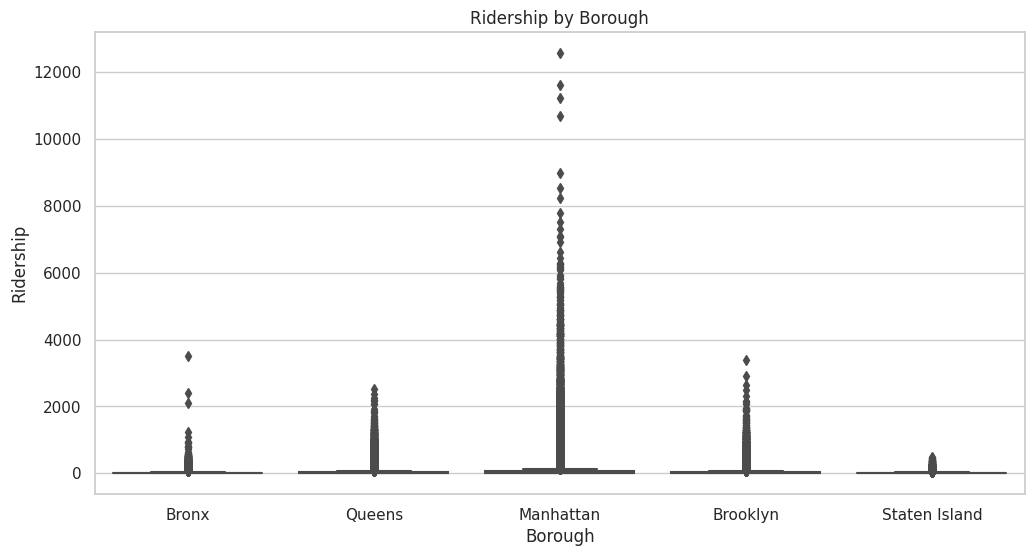

In [10]:
print("\nData Types Before Conversion:")
print(df_ridership.dtypes)

df_ridership['transit_timestamp'] = pd.to_datetime(df_ridership['transit_timestamp'], errors='coerce')

print("\nData Types After Conversion:")
print(df_ridership.dtypes)

num_nat = df_ridership['transit_timestamp'].isnull().sum()
print(f"\nNumber of NaT in 'transit_timestamp': {num_nat}")


if num_nat > 0:
    df_ridership.dropna(subset=['transit_timestamp'], inplace=True)
    print(f"Dropped {num_nat} rows with invalid 'transit_timestamp'")


num_duplicates = df_ridership.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")

if num_duplicates > 0:
    df_ridership.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows")

print("\nUnique 'station_complex_id' Formats:")
print(df_ridership['station_complex_id'].unique())

df_ridership['station_complex_id'] = df_ridership['station_complex_id'].astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=df_ridership, x='transit_timestamp', y='ridership')
plt.title('Ridership Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Ridership')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_ridership['ridership'], bins=50, kde=True)
plt.title('Distribution of Ridership')
plt.xlabel('Ridership')
plt.ylabel('Frequency')
plt.show()

if 'borough' in df_ridership.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='borough', y='ridership', data=df_ridership)
    plt.title('Ridership by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Ridership')
    plt.show()

# Data Exploration and Preprocessing

## Initial Data Inspection
This section performs a comprehensive exploration and cleaning of the MTA Origin-Destination ridership data. We examine the data structure, handle missing values, and prepare the data for analysis.

## Data Quality Checks
We perform several quality checks on the dataset:
- Basic dataframe information and structure
- Summary statistics of numerical columns 
- Missing value visualization and handling
- Data type verification and conversion
- Duplicate detection and removal
- Type casting for station IDs

## Data Cleaning Steps
1. Handle missing values in 'Estimated Average Ridership' using median imputation
2. Convert 'Timestamp' column to datetime format
3. Remove invalid timestamp entries (NaT values) 
4. Remove duplicate records
5. Convert station IDs to string format for consistency

## Visualization Analysis
Three key visualizations are created to understand ridership patterns:

1. **Ridership Distribution Plot**
  - Histogram with KDE showing the distribution of estimated ridership
  - Helps identify typical ridership levels and outliers

2. **Top Origins Analysis**
  - Bar chart of the 10 busiest origin stations
  - Shows which stations have highest outbound traffic

3. **Origin-Destination Heatmap**
  - Comprehensive visualization of ridership flows
  - Shows patterns between origin and destination pairs
  - Uses color intensity to represent ridership volume

This analysis provides insights into:
- Station usage patterns
- Popular travel routes
- System-wide ridership distribution


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762945 entries, 0 to 762944
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Year                              762945 non-null  int64  
 1   Month                             762945 non-null  int64  
 2   Day of Week                       762945 non-null  object 
 3   Hour of Day                       762945 non-null  int64  
 4   Timestamp                         762945 non-null  object 
 5   Origin Station Complex ID         762945 non-null  int64  
 6   Origin Station Complex Name       762945 non-null  object 
 7   Origin Latitude                   762945 non-null  float64
 8   Origin Longitude                  762945 non-null  float64
 9   Destination Station Complex ID    762945 non-null  int64  
 10  Destination Station Complex Name  762945 non-null  object 
 11  Destination Latitude              7

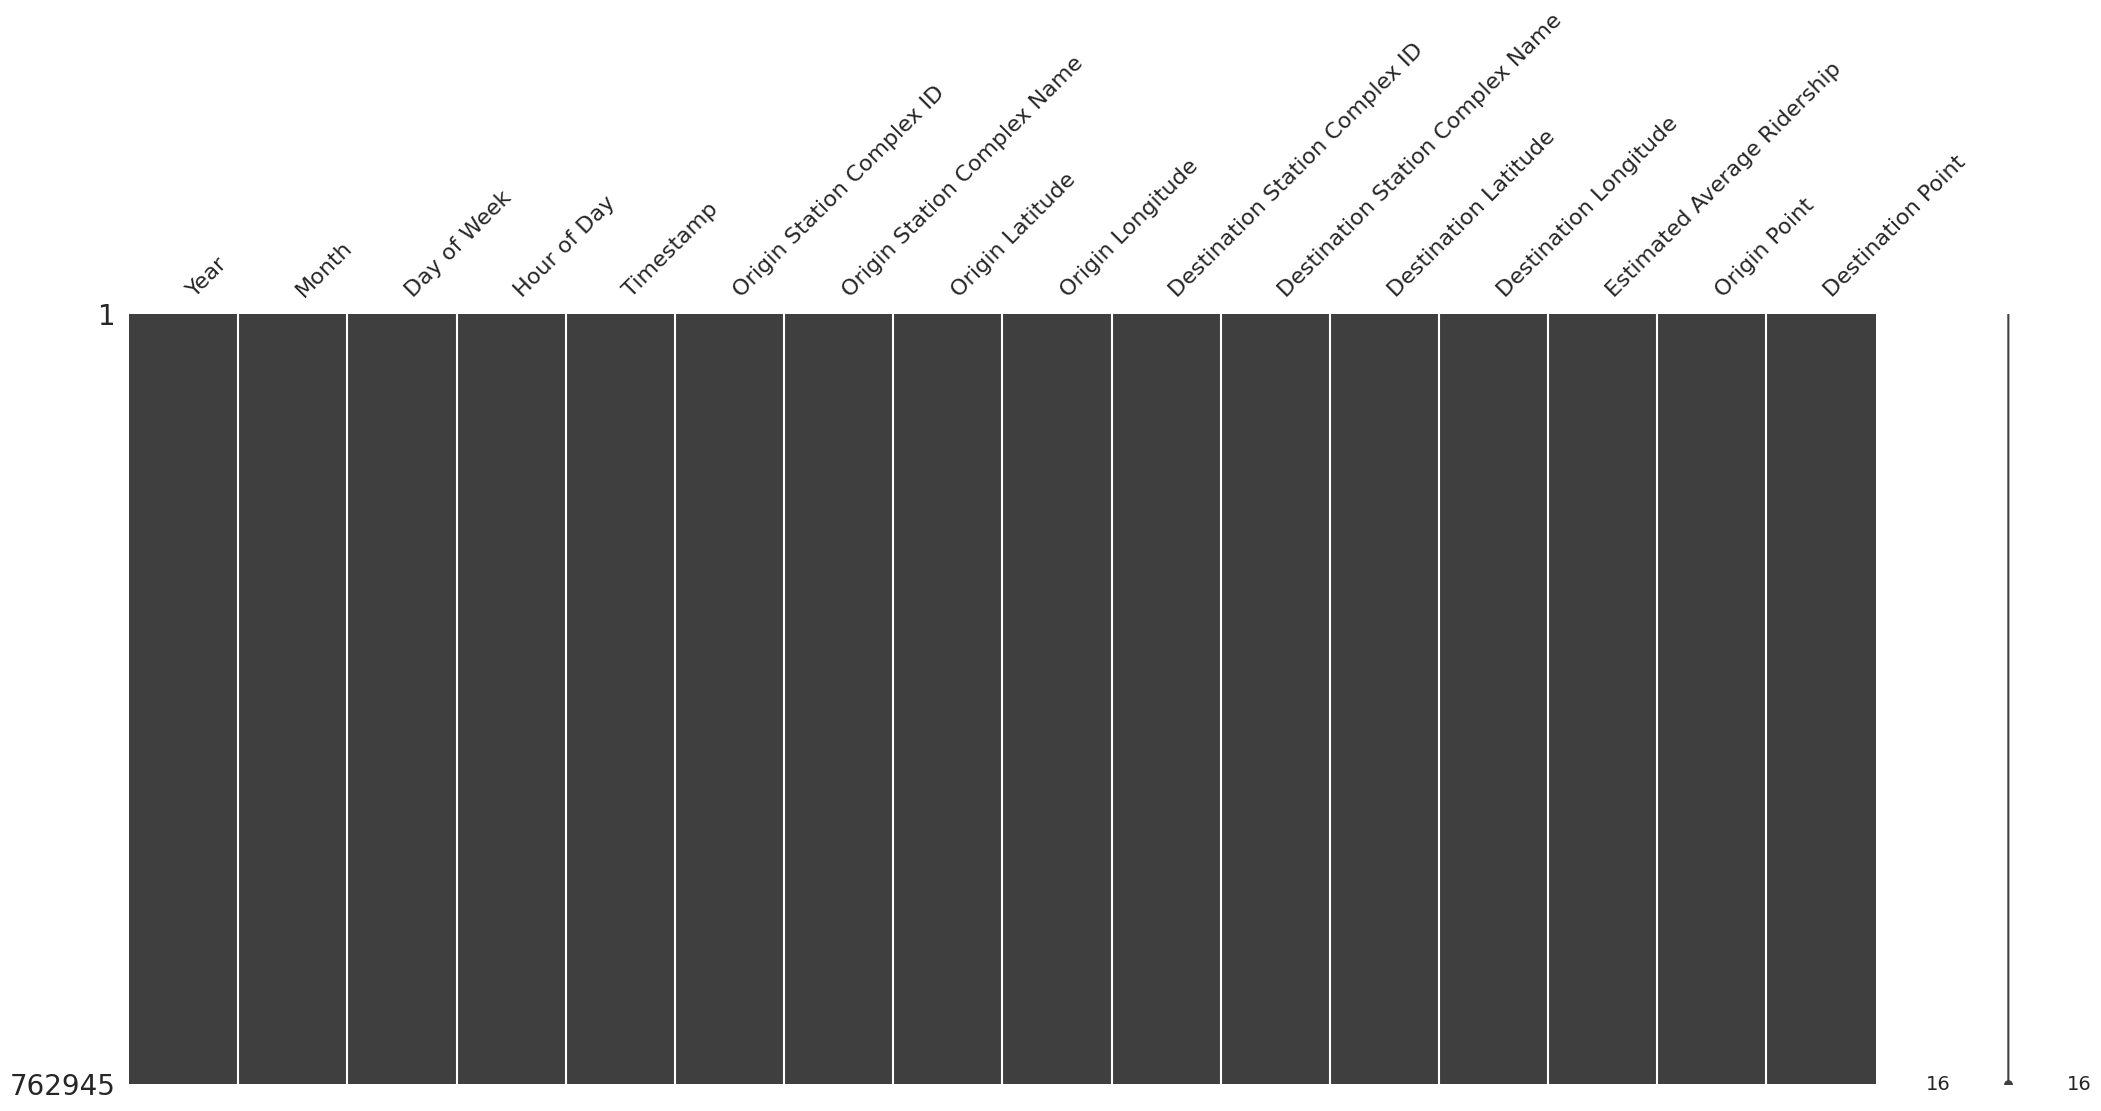


Missing Values per Column:
Year                                0
Month                               0
Day of Week                         0
Hour of Day                         0
Timestamp                           0
Origin Station Complex ID           0
Origin Station Complex Name         0
Origin Latitude                     0
Origin Longitude                    0
Destination Station Complex ID      0
Destination Station Complex Name    0
Destination Latitude                0
Destination Longitude               0
Estimated Average Ridership         0
Origin Point                        0
Destination Point                   0
dtype: int64

Data Types Before Conversion:
Year                                  int64
Month                                 int64
Day of Week                          object
Hour of Day                           int64
Timestamp                            object
Origin Station Complex ID             int64
Origin Station Complex Name          object
Origin Latit

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


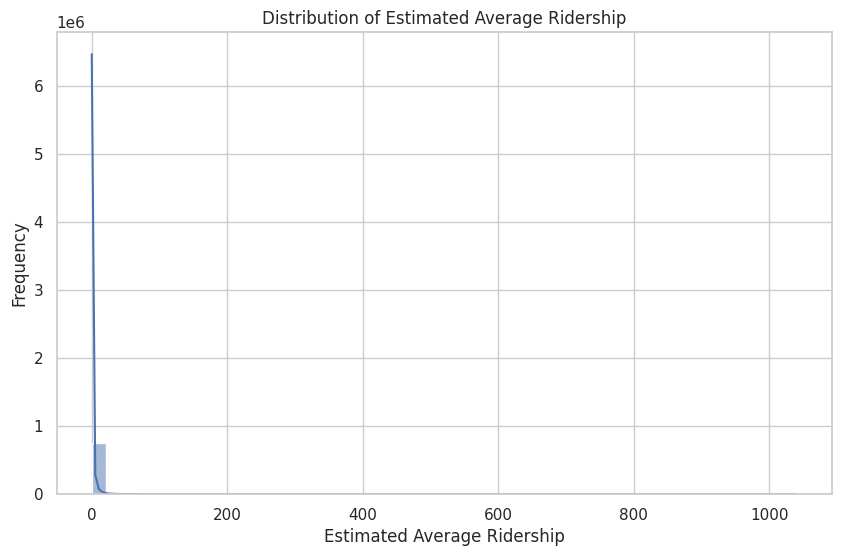

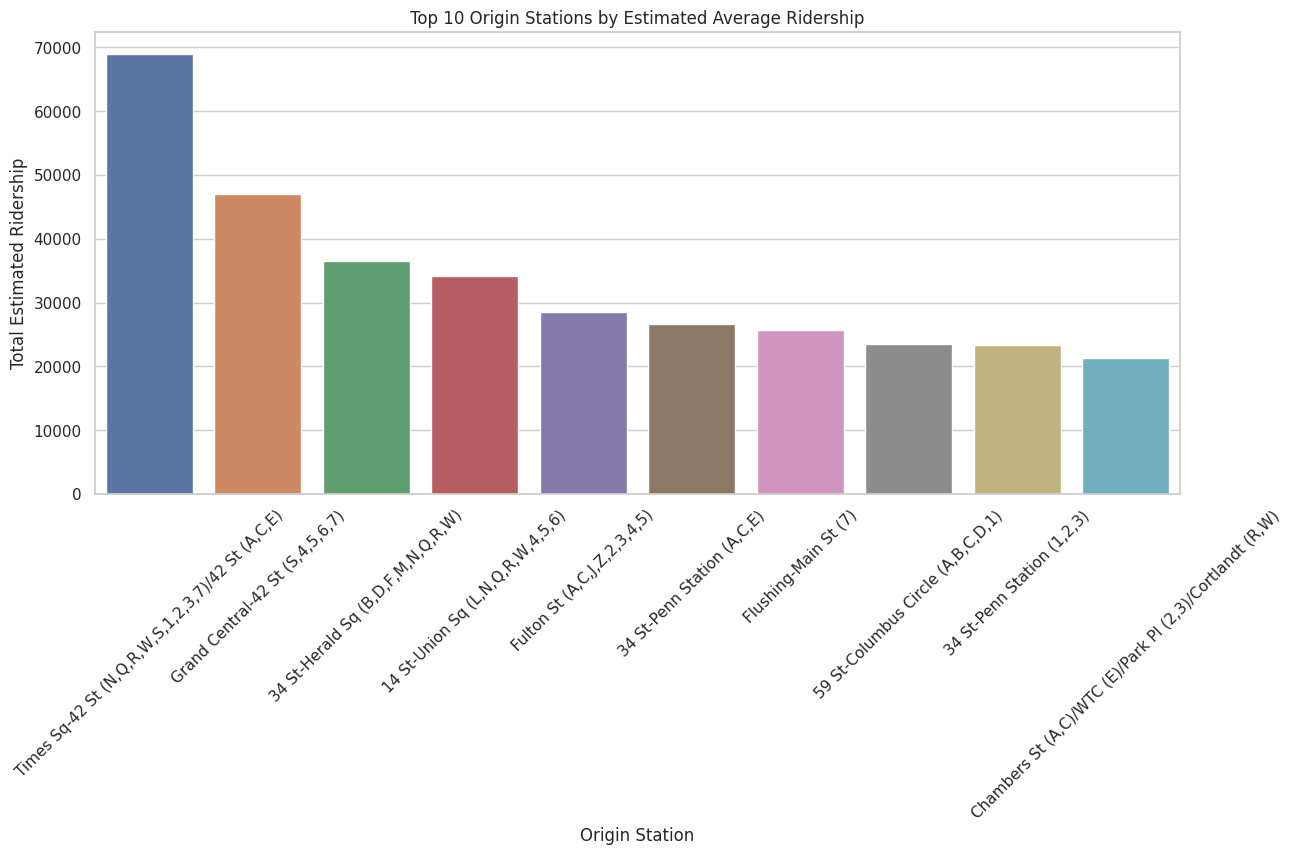

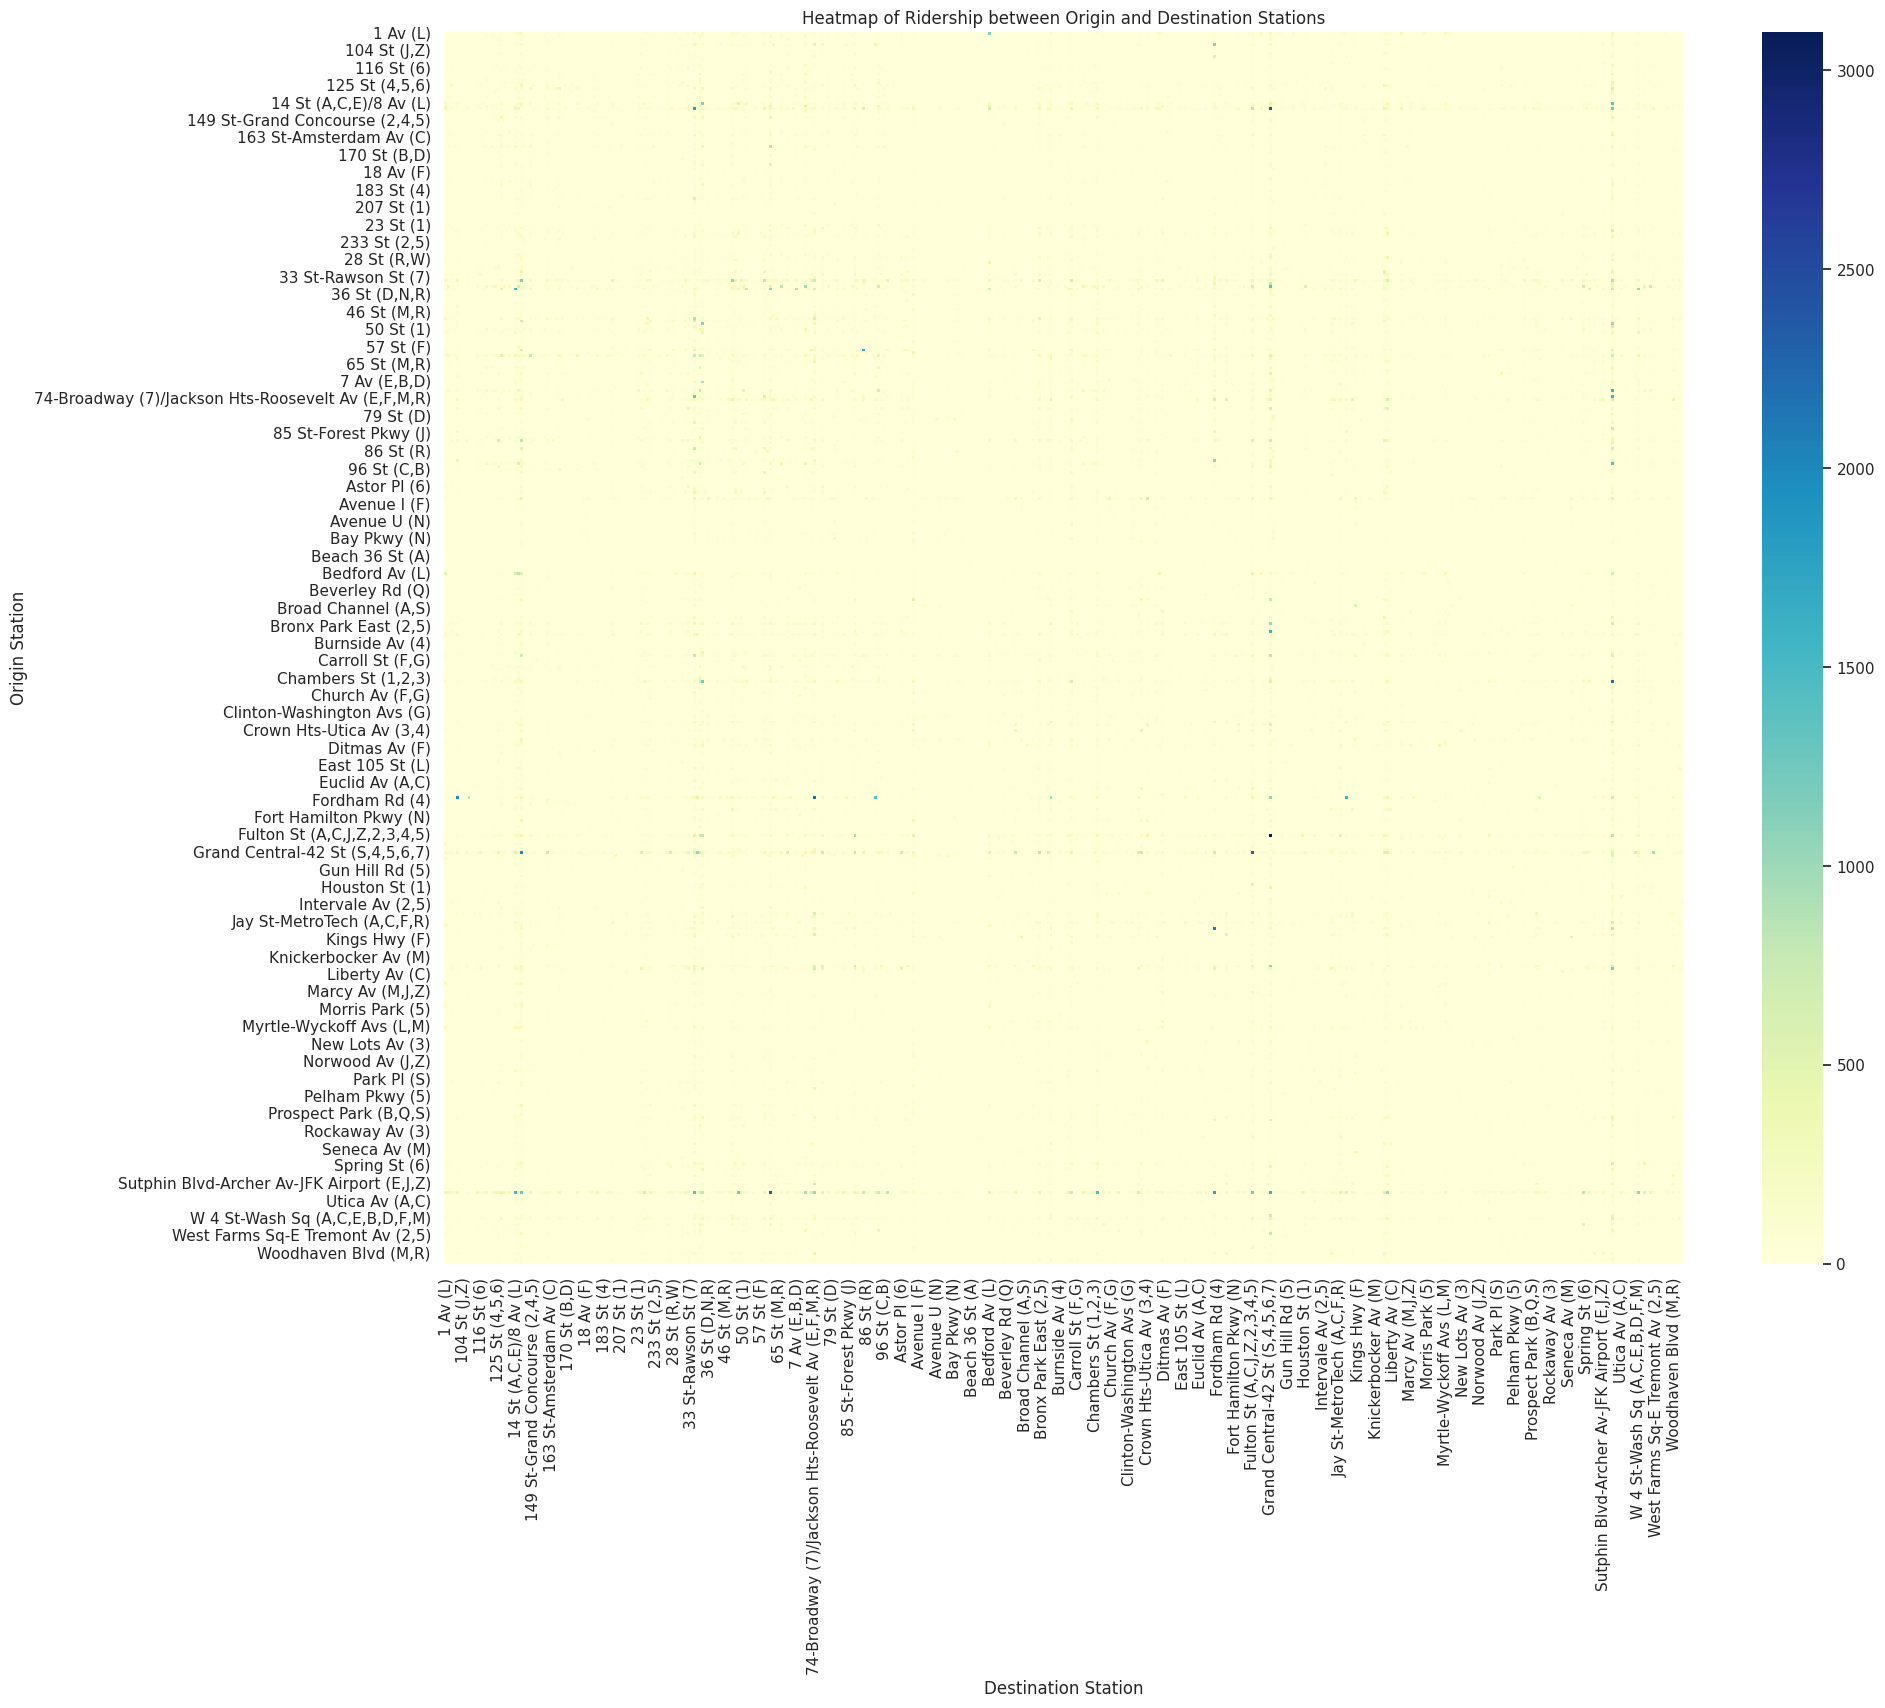

In [11]:

df_od = dataframes['MTA_Subway_Origin-Destination_Ridership_Estimate__2024']

print("\nDataframe Info:")
print(df_od.info())

print("\nSummary Statistics:")
print(df_od.describe())

msno.matrix(df_od)
plt.show()

print("\nMissing Values per Column:")
print(df_od.isnull().sum())

if df_od['Estimated Average Ridership'].isnull().sum() > 0:
    median_ridership = df_od['Estimated Average Ridership'].median()
    df_od['Estimated Average Ridership'].fillna(median_ridership, inplace=True)
    print(f"Filled missing 'Estimated Average Ridership' with median value: {median_ridership}")


print("\nData Types Before Conversion:")
print(df_od.dtypes)


df_od['Timestamp'] = pd.to_datetime(df_od['Timestamp'], errors='coerce')

print("\nData Types After Conversion:")
print(df_od.dtypes)

num_nat = df_od['Timestamp'].isnull().sum()
print(f"\nNumber of NaT in 'Timestamp': {num_nat}")

if num_nat > 0:
    df_od.dropna(subset=['Timestamp'], inplace=True)
    print(f"Dropped {num_nat} rows with invalid 'Timestamp'")

num_duplicates = df_od.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")


if num_duplicates > 0:
    df_od.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows")

df_od['Origin Station Complex ID'] = df_od['Origin Station Complex ID'].astype(str)
df_od['Destination Station Complex ID'] = df_od['Destination Station Complex ID'].astype(str)

plt.figure(figsize=(10,6))
sns.histplot(df_od['Estimated Average Ridership'], bins=50, kde=True)
plt.title('Distribution of Estimated Average Ridership')
plt.xlabel('Estimated Average Ridership')
plt.ylabel('Frequency')
plt.show()

top_origins = df_od.groupby('Origin Station Complex Name')['Estimated Average Ridership'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=top_origins.index, y=top_origins.values)
plt.title('Top 10 Origin Stations by Estimated Average Ridership')
plt.xlabel('Origin Station')
plt.ylabel('Total Estimated Ridership')
plt.xticks(rotation=45)
plt.show()

pivot_table = df_od.pivot_table(values='Estimated Average Ridership',
                               index='Origin Station Complex Name',
                               columns='Destination Station Complex Name',
                               aggfunc='sum',
                               fill_value=0)

plt.figure(figsize=(20,16))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Ridership between Origin and Destination Stations')
plt.xlabel('Destination Station')
plt.ylabel('Origin Station')
plt.show()

First 5 rows:


,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description
0,345264,167130,0,08/26/2024 11:33:00 AM,NYCT Subway,delays,6,Northbound 6 trains are delayed while we addre...,NaN
1,345139,167055,0,08/25/2024 10:47:00 PM,NYCT Subway,delays,A,Southbound A trains are delayed while FDNY res...,NaN
2,344558,166767,0,08/23/2024 02:44:00 PM,BT,planned-work,Throgs Neck Bridge,Throgs Neck Bridge: Planned work; Bronx bound ...,NaN
3,342848,165879,0,08/18/2024 11:12:00 AM,BT,delays,Marine Parkway Bridge,MPB: Vehicle collision; Brooklyn bound blockin...,NaN
4,342668,165788,0,08/17/2024 12:11:00 PM,NYCT Subway,delays,N,Northbound N trains are delayed while we addre...,NaN



Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351631 entries, 0 to 351630
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Alert ID       351631 non-null  int64 
 1   Event ID       351631 non-null  int64 
 2   Update Number  351631 non-null  int64 
 3   Date           351631 non-null  object
 4   Agency         351631 non-null  object
 5   Status Label   351631 non-null  object
 6   Affected       350159 non-null  object
 7   Header         351489 non-null  object
 8   Description    123665 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.1+ MB
None

Summary Statistics:
             Alert ID       Event ID  Update Number                    Date  \
count   351631.000000  351631.000000  351631.000000                  351631   
unique            NaN            NaN            NaN                  302876   
top               NaN            NaN            NaN  01/29/2022 05:00:00 AM

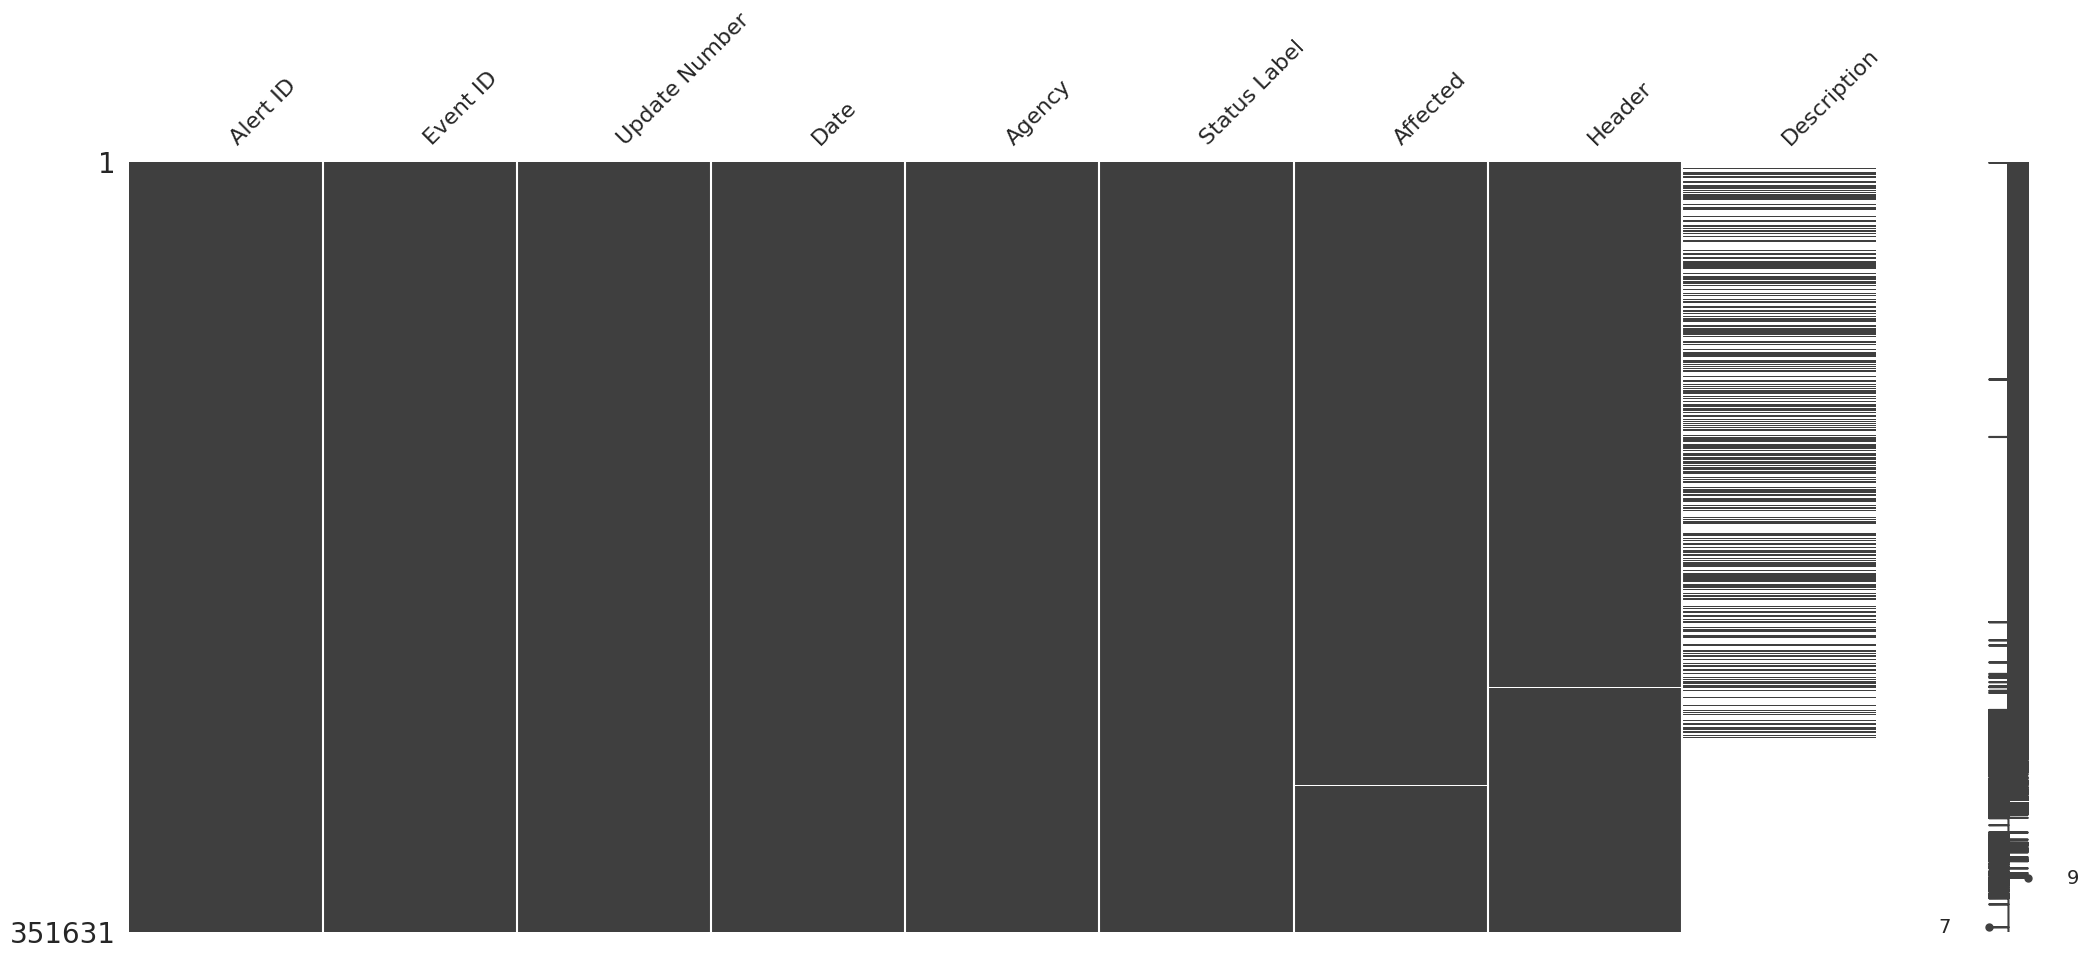


Missing Values per Column:
Alert ID              0
Event ID              0
Update Number         0
Date                  0
Agency                0
Status Label          0
Affected           1472
Header              142
Description      227966
dtype: int64
Dropped rows with missing 'Description'

Data Types Before Conversion:
Alert ID          int64
Event ID          int64
Update Number     int64
Date             object
Agency           object
Status Label     object
Affected         object
Header           object
Description      object
dtype: object


/tmp/ipykernel_30/4070566813.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_alerts['Date'] = pd.to_datetime(df_alerts['Date'], errors='coerce')



Data Types After Conversion:
Alert ID                  int64
Event ID                  int64
Update Number             int64
Date             datetime64[ns]
Agency                   object
Status Label             object
Affected                 object
Header                   object
Description              object
dtype: object

Number of NaT in 'Date': 0

Number of Duplicate Alert IDs: 0


In [13]:
df_alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020']

print("First 5 rows:")
display(df_alerts.head())

print("\nDataframe Info:")
print(df_alerts.info())

print("\nSummary Statistics:")
print(df_alerts.describe(include='all'))

msno.matrix(df_alerts)
plt.show()

print("\nMissing Values per Column:")
print(df_alerts.isnull().sum())

if df_alerts['Description'].isnull().sum() > 0:
    df_alerts.dropna(subset=['Description'], inplace=True)
    print("Dropped rows with missing 'Description'")

print("\nData Types Before Conversion:")
print(df_alerts.dtypes)

df_alerts['Date'] = pd.to_datetime(df_alerts['Date'], errors='coerce')

print("\nData Types After Conversion:")
print(df_alerts.dtypes)

num_nat = df_alerts['Date'].isnull().sum()
print(f"\nNumber of NaT in 'Date': {num_nat}")

if num_nat > 0:
    df_alerts.dropna(subset=['Date'], inplace=True)
    print(f"Dropped {num_nat} rows with invalid 'Date'")


num_duplicates = df_alerts.duplicated(subset=['Alert ID']).sum()
print(f"\nNumber of Duplicate Alert IDs: {num_duplicates}")

if num_duplicates > 0:
    df_alerts.drop_duplicates(subset=['Alert ID'], inplace=True)
    print(f"Removed {num_duplicates} duplicate alerts based on 'Alert ID'")

df_alerts['Status Label'] = df_alerts['Status Label'].str.strip().str.lower()

df_alerts['Affected'] = df_alerts['Affected'].fillna('Unknown')

# Number of alerts over time
plt.figure(figsize=(14,6))
sns.countplot(data=df_alerts, x='Date', order=df_alerts['Date'].value_counts().index)
plt.title('Number of Service Alerts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=45)
plt.show()

# # Alerts by Status Label
plt.figure(figsize=(10,6))
sns.countplot(data=df_alerts, x='Status Label')
plt.title('Service Alerts by Status Label')
plt.xlabel('Status Label')
plt.ylabel('Count')
plt.show()

# # Top Affected Stations or Lines
top_affected = df_alerts['Affected'].value_counts().head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=top_affected.index, y=top_affected.values)
plt.title('Top 10 Affected Stations/Lines')
plt.xlabel('Affected Station/Line')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=45)
plt.show()

In [14]:
num_duplicates = df_alerts.duplicated(subset=['Alert ID']).sum()
print(f"\nNumber of Duplicate Alert IDs: {num_duplicates}")

if num_duplicates > 0:
    df_alerts.drop_duplicates(subset=['Alert ID'], inplace=True)
    print(f"Removed {num_duplicates} duplicate alerts based on 'Alert ID'")



Number of Duplicate Alert IDs: 0


First 5 rows:


,Complex ID,Is Complex,Number Of Stations In Complex,Stop Name,Display Name,Constituent Station Names,Station IDs,GTFS Stop IDs,Borough,CBD,Daytime Routes,Structure Type,Latitude,Longitude,ADA,ADA Notes
0,1,False,1,Astoria-Ditmars Blvd,Astoria-Ditmars Blvd (N W),Astoria-Ditmars Blvd,1,R01,Q,False,N W,Elevated,40.775036,-73.912034,0,NaN
1,2,False,1,Astoria Blvd,Astoria Blvd (N W),Astoria Blvd,2,R03,Q,False,N W,Elevated,40.770258,-73.917843,1,NaN
2,3,False,1,30 Av,30 Av (N W),30 Av,3,R04,Q,False,N W,Elevated,40.766779,-73.921479,0,NaN
3,4,False,1,Broadway,Broadway (N W),Broadway,4,R05,Q,False,N W,Elevated,40.761820,-73.925508,0,NaN
4,5,False,1,36 Av,36 Av (N W),36 Av,5,R06,Q,False,N W,Elevated,40.756804,-73.929575,0,NaN



Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Complex ID                     445 non-null    int64  
 1   Is Complex                     445 non-null    bool   
 2   Number Of Stations In Complex  445 non-null    int64  
 3   Stop Name                      445 non-null    object 
 4   Display Name                   445 non-null    object 
 5   Constituent Station Names      445 non-null    object 
 6   Station IDs                    445 non-null    object 
 7   GTFS Stop IDs                  445 non-null    object 
 8   Borough                        445 non-null    object 
 9   CBD                            445 non-null    bool   
 10  Daytime Routes                 445 non-null    object 
 11  Structure Type                 445 non-null    object 
 12  Latitude                       44

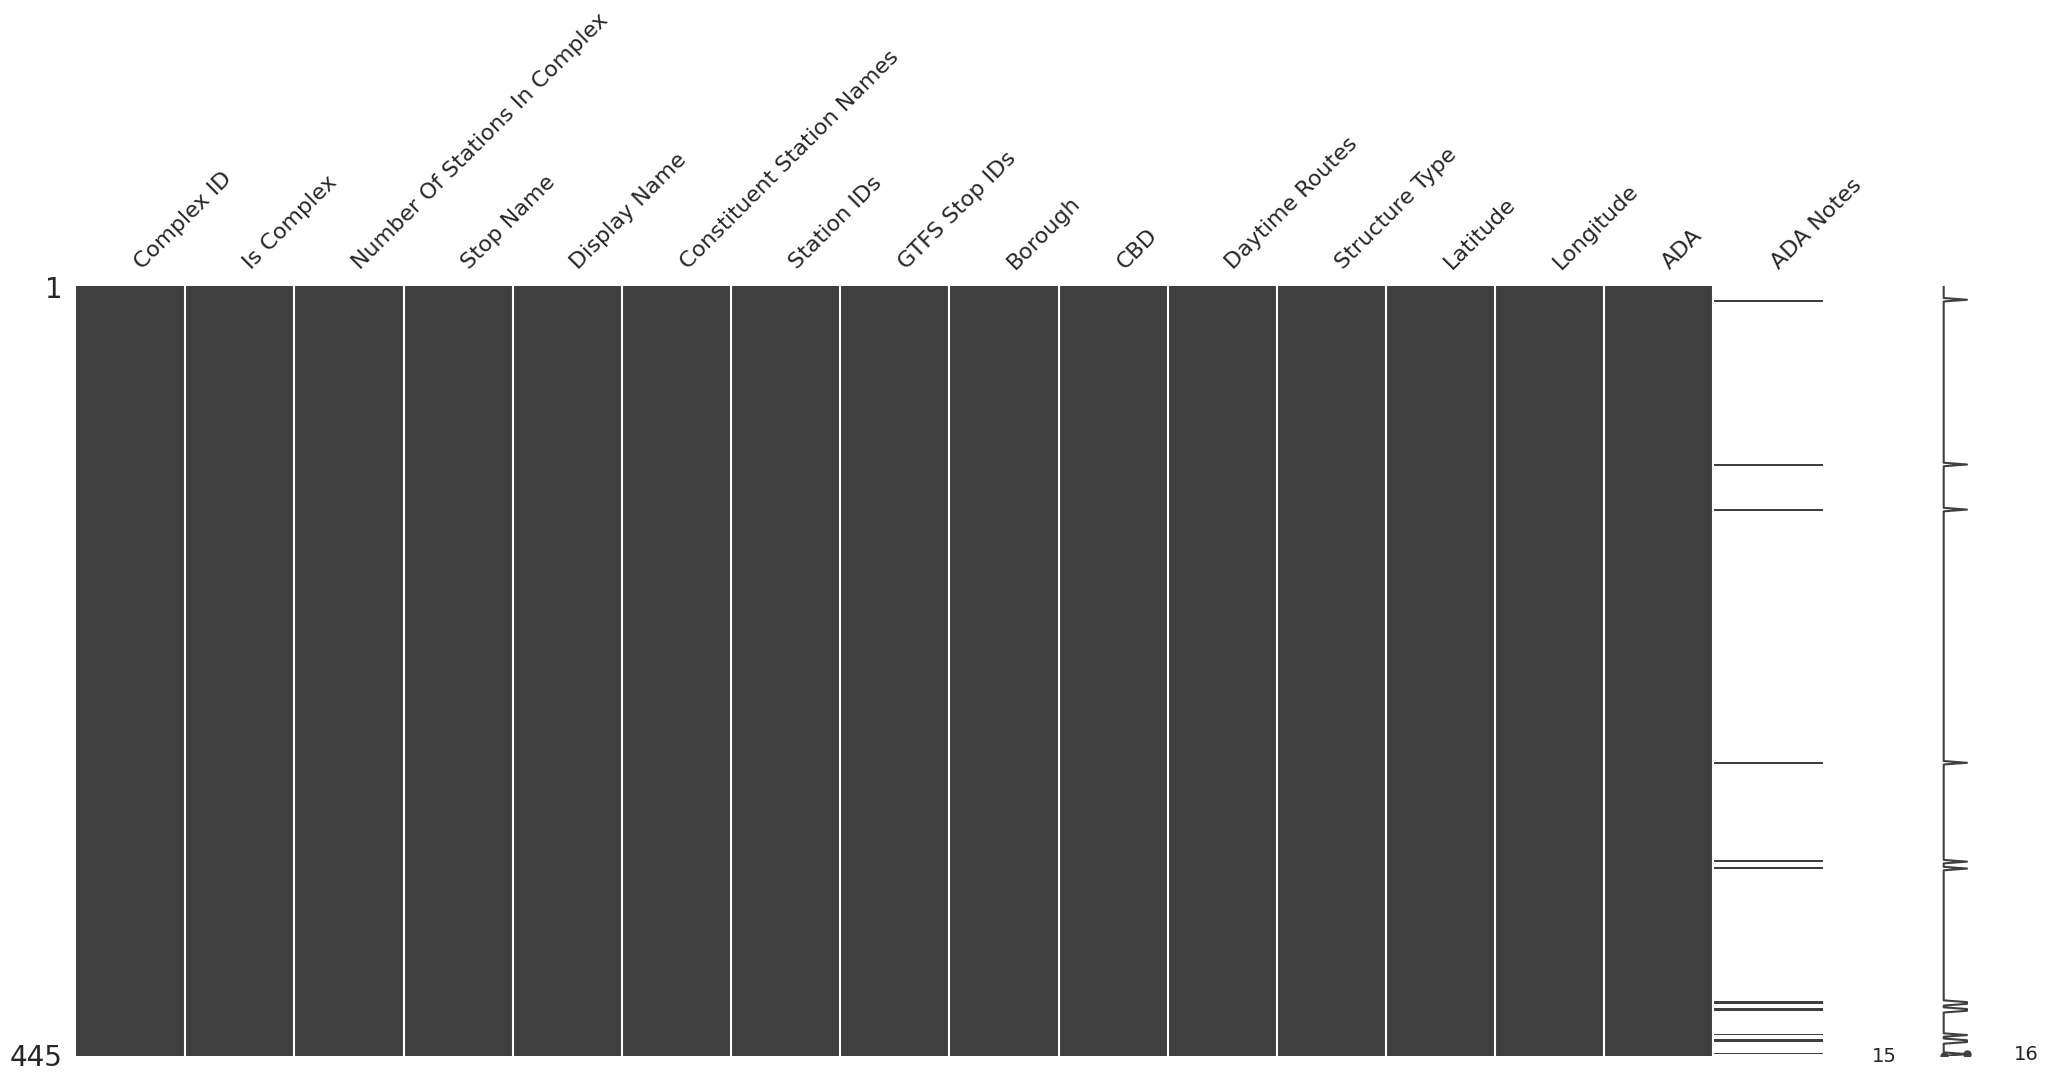


Missing Values per Column:
Complex ID                         0
Is Complex                         0
Number Of Stations In Complex      0
Stop Name                          0
Display Name                       0
Constituent Station Names          0
Station IDs                        0
GTFS Stop IDs                      0
Borough                            0
CBD                                0
Daytime Routes                     0
Structure Type                     0
Latitude                           0
Longitude                          0
ADA                                0
ADA Notes                        431
dtype: int64
Filled missing 'ADA Notes' with 'No Notes'

Data Types Before Conversion:
Complex ID                         int64
Is Complex                          bool
Number Of Stations In Complex      int64
Stop Name                         object
Display Name                      object
Constituent Station Names         object
Station IDs                       object
GTFS S

/tmp/ipykernel_30/3039158761.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stations['ADA Notes'].fillna('No Notes', inplace=True)


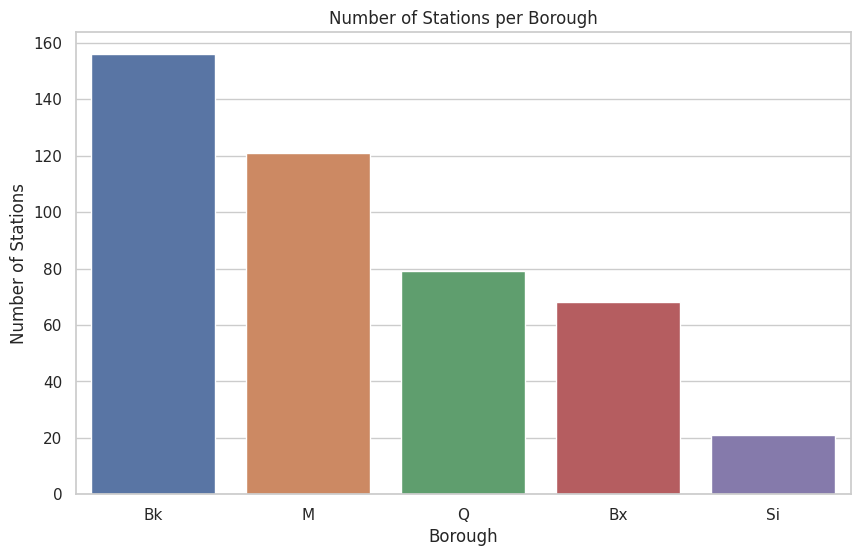

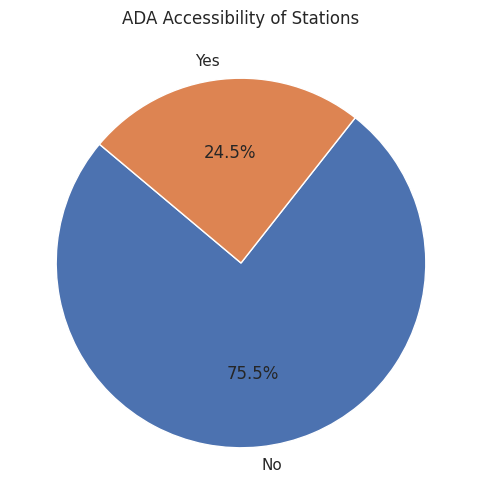

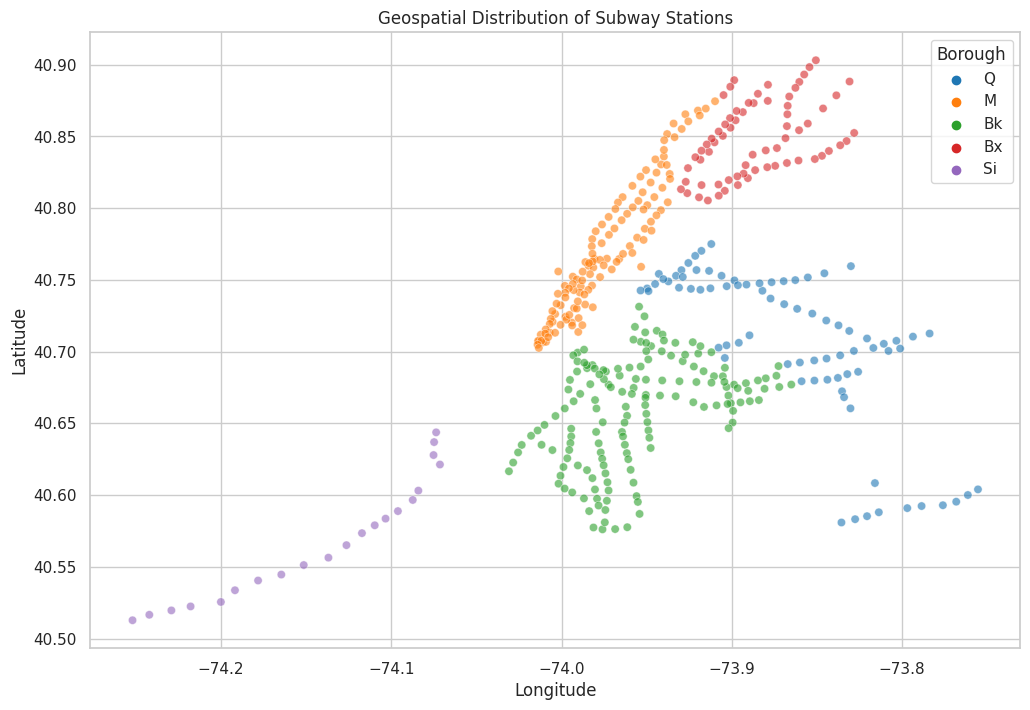

In [15]:
df_stations = dataframes['MTA_Subway_Stations_and_Complexes']

print("First 5 rows:")
display(df_stations.head())

print("\nDataframe Info:")
print(df_stations.info())

print("\nSummary Statistics:")
print(df_stations.describe(include='all'))

msno.matrix(df_stations)
plt.show()

print("\nMissing Values per Column:")
print(df_stations.isnull().sum())

if df_stations['ADA Notes'].isnull().sum() > 0:
    df_stations['ADA Notes'].fillna('No Notes', inplace=True)
    print("Filled missing 'ADA Notes' with 'No Notes'")

print("\nData Types Before Conversion:")
print(df_stations.dtypes)


df_stations['Latitude'] = pd.to_numeric(df_stations['Latitude'], errors='coerce')
df_stations['Longitude'] = pd.to_numeric(df_stations['Longitude'], errors='coerce')

print("\nData Types After Conversion:")
print(df_stations.dtypes)

num_lat_nan = df_stations['Latitude'].isnull().sum()
num_lon_nan = df_stations['Longitude'].isnull().sum()
print(f"\nNumber of NaN in 'Latitude': {num_lat_nan}")
print(f"Number of NaN in 'Longitude': {num_lon_nan}")

if num_lat_nan > 0 or num_lon_nan > 0:
    df_stations.dropna(subset=['Latitude', 'Longitude'], inplace=True)
    print(f"Dropped {num_lat_nan + num_lon_nan} rows with missing coordinates")

num_duplicates = df_stations.duplicated(subset=['GTFS Stop IDs']).sum()
print(f"\nNumber of Duplicate GTFS Stop IDs: {num_duplicates}")

if num_duplicates > 0:
    df_stations.drop_duplicates(subset=['GTFS Stop ID'], inplace=True)
    print(f"Removed {num_duplicates} duplicate stations based on 'GTFS Stop ID'")


df_stations['Borough'] = df_stations['Borough'].str.title()


df_stations['ADA'] = df_stations['ADA'].apply(lambda x: 'Yes' if x == 1 else 'No')


stations_per_borough = df_stations['Borough'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=stations_per_borough.index, y=stations_per_borough.values)
plt.title('Number of Stations per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Stations')
plt.show()


ada_counts = df_stations['ADA'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ada_counts, labels=ada_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ADA Accessibility of Stations')
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_stations, x='Longitude', y='Latitude', hue='Borough', palette='tab10', alpha=0.6)
plt.title('Geospatial Distribution of Subway Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.show()

In [16]:
cleaned_data_dir = "/kaggle/working/cleaned_data/"
os.makedirs(cleaned_data_dir, exist_ok=True)

df_ridership.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Subway_Hourly_Ridership.csv"), index=False)
df_od.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Subway_Origin-Destination_Ridership_Estimate.csv"), index=False)
df_alerts.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Service_Alerts.csv"), index=False)
df_stations.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Subway_Stations_and_Complexes.csv"), index=False)

print("Cleaned dataframes have been saved successfully.")

Cleaned dataframes have been saved successfully.


In [17]:
print(df_ridership.columns)
print(df_stations.columns)

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')
Index(['Complex ID', 'Is Complex', 'Number Of Stations In Complex',
       'Stop Name', 'Display Name', 'Constituent Station Names', 'Station IDs',
       'GTFS Stop IDs', 'Borough', 'CBD', 'Daytime Routes', 'Structure Type',
       'Latitude', 'Longitude', 'ADA', 'ADA Notes'],
      dtype='object')


In [18]:
df_stations.rename(columns={'Complex ID': 'station_complex_id'}, inplace=True)

df_ridership['station_complex_id'] = df_ridership['station_complex_id'].astype(str)
df_stations['station_complex_id'] = df_stations['station_complex_id'].astype(str)

df_ridership = df_ridership.merge(
    df_stations,
    how='left',
    on='station_complex_id',  
    suffixes=('', '_station')
)


print(f"After merging with stations: {df_ridership.shape}")
print(df_ridership.head())


After merging with stations: (1054764, 27)
    transit_timestamp transit_mode station_complex_id    station_complex  \
0 2024-04-02 09:00:00       subway                429   Freeman St (2,5)   
1 2024-03-27 23:00:00       subway                271  Steinway St (M,R)   
2 2024-03-07 16:00:00       subway                268        65 St (M,R)   
3 2024-03-20 05:00:00       subway                118           3 Av (L)   
4 2024-03-27 19:00:00       subway                306         125 St (1)   

     borough payment_method               fare_class_category  ridership  \
0      Bronx      metrocard       Metrocard - Unlimited 7-Day         13   
1     Queens      metrocard       Metrocard - Unlimited 7-Day         12   
2     Queens      metrocard  Metrocard - Seniors & Disability          2   
3  Manhattan           omny                  OMNY - Full Fare          4   
4  Manhattan      metrocard       Metrocard - Unlimited 7-Day         14   

   transfers   latitude  ...  Station IDs G

In [19]:
df_od['Origin Station Complex ID'] = df_od['Origin Station Complex ID'].astype(str)
df_od['Destination Station Complex ID'] = df_od['Destination Station Complex ID'].astype(str)

df_stations['station_complex_id'] = df_stations['station_complex_id'].astype(str)

df_od = df_od.merge(
    df_stations,
    how='left',
    left_on='Origin Station Complex ID',
    right_on='station_complex_id',
    suffixes=('_origin', '_station')
).merge(
    df_stations,
    how='left',
    left_on='Destination Station Complex ID',
    right_on='station_complex_id',
    suffixes=('_origin', '_destination')
)

print(f"After merging OD with stations: {df_od.shape}")
print(df_od.head())


After merging OD with stations: (762945, 48)
   Year  Month Day of Week  Hour of Day           Timestamp  \
0  2024      1     Tuesday           12 2024-01-09 12:00:00   
1  2024      1     Tuesday           17 2024-01-09 17:00:00   
2  2024      1     Tuesday            9 2024-01-09 09:00:00   
3  2024      1     Tuesday            8 2024-01-09 08:00:00   
4  2024      1     Tuesday           17 2024-01-09 17:00:00   

  Origin Station Complex ID Origin Station Complex Name  Origin Latitude  \
0                       475                   96 St (Q)        40.784318   
1                        13                 28 St (R,W)        40.745494   
2                       258             Briarwood (E,F)        40.709179   
3                        66                   18 Av (D)        40.607954   
4                       269         Northern Blvd (M,R)        40.752885   

   Origin Longitude Destination Station Complex ID  ...  \
0        -73.947152                            312  ...   
1

In [20]:
df_ridership['transit_timestamp'] = pd.to_datetime(df_ridership['transit_timestamp'])

df_ridership['alert_date'] = df_ridership['transit_timestamp'].dt.date

alerts_mapping = df_alerts.groupby('Date')['Affected'].apply(list).reset_index()

alerts_dict = pd.to_datetime(alerts_mapping['Date']).dt.date.tolist(), alerts_mapping['Affected'].tolist()

date_to_affected = dict(zip(alerts_dict[0], alerts_dict[1]))


def flag_alerts(row):
    affected_stations = date_to_affected.get(row['alert_date'], [])
    if row['Stop Name'] in affected_stations:
        return 1
    else:
        return 0

df_ridership['is_alert'] = df_ridership.apply(flag_alerts, axis=1)

print(f"After flagging alerts: {df_ridership.shape}")
print(df_ridership.head())


After flagging alerts: (1054764, 29)
    transit_timestamp transit_mode station_complex_id    station_complex  \
0 2024-04-02 09:00:00       subway                429   Freeman St (2,5)   
1 2024-03-27 23:00:00       subway                271  Steinway St (M,R)   
2 2024-03-07 16:00:00       subway                268        65 St (M,R)   
3 2024-03-20 05:00:00       subway                118           3 Av (L)   
4 2024-03-27 19:00:00       subway                306         125 St (1)   

     borough payment_method               fare_class_category  ridership  \
0      Bronx      metrocard       Metrocard - Unlimited 7-Day         13   
1     Queens      metrocard       Metrocard - Unlimited 7-Day         12   
2     Queens      metrocard  Metrocard - Seniors & Disability          2   
3  Manhattan           omny                  OMNY - Full Fare          4   
4  Manhattan      metrocard       Metrocard - Unlimited 7-Day         14   

   transfers   latitude  ...  Borough    CBD Dayt

In [21]:
df_od['Hour'] = df_od['Timestamp'].dt.hour
df_od['Date'] = df_od['Timestamp'].dt.date

df_od_agg = df_od.groupby(['Date', 'Hour', 'Destination Station Complex Name'])['Estimated Average Ridership'].sum().reset_index()
df_od_agg.rename(columns={'Destination Station Complex Name': 'Stop Name', 'Estimated Average Ridership': 'OD_ridership'}, inplace=True)

df_master = df_ridership.merge(
    df_od_agg,
    how='left',
    left_on=['alert_date', df_ridership['transit_timestamp'].dt.hour, 'Stop Name'],
    right_on=['Date', 'Hour', 'Stop Name'],
    suffixes=('', '_OD')
)

df_master['OD_ridership'].fillna(0, inplace=True)

df_master.drop(['Date', 'Hour'], axis=1, inplace=True)

print(f"Master dataframe shape: {df_master.shape}")
print(df_master.head())


/tmp/ipykernel_30/261853851.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['OD_ridership'].fillna(0, inplace=True)


Master dataframe shape: (1054764, 30)
    transit_timestamp transit_mode station_complex_id    station_complex  \
0 2024-04-02 09:00:00       subway                429   Freeman St (2,5)   
1 2024-03-27 23:00:00       subway                271  Steinway St (M,R)   
2 2024-03-07 16:00:00       subway                268        65 St (M,R)   
3 2024-03-20 05:00:00       subway                118           3 Av (L)   
4 2024-03-27 19:00:00       subway                306         125 St (1)   

     borough payment_method               fare_class_category  ridership  \
0      Bronx      metrocard       Metrocard - Unlimited 7-Day         13   
1     Queens      metrocard       Metrocard - Unlimited 7-Day         12   
2     Queens      metrocard  Metrocard - Seniors & Disability          2   
3  Manhattan           omny                  OMNY - Full Fare          4   
4  Manhattan      metrocard       Metrocard - Unlimited 7-Day         14   

   transfers   latitude  ...    CBD Daytime Rout

In [22]:
print(df_master[['Stop Name', 'station_complex_id', 'OD_ridership']].isnull().sum())

Stop Name             4024
station_complex_id       0
OD_ridership             0
dtype: int64


In [23]:
print(df_master[['Stop Name', 'station_complex_id']].drop_duplicates().head())

     Stop Name station_complex_id
0   Freeman St                429
1  Steinway St                271
2        65 St                268
3         3 Av                118
4       125 St                306


In [24]:
sample_record = df_master.iloc[0]
print("Sample Record:")
print(sample_record)

Sample Record:
transit_timestamp                        2024-04-02 09:00:00
transit_mode                                          subway
station_complex_id                                       429
station_complex                             Freeman St (2,5)
borough                                                Bronx
payment_method                                     metrocard
fare_class_category              Metrocard - Unlimited 7-Day
ridership                                                 13
transfers                                                  0
latitude                                           40.829994
longitude                                          -73.89187
Georeference                     POINT (-73.89187 40.829994)
Is Complex                                             False
Number Of Stations In Complex                            1.0
Stop Name                                         Freeman St
Display Name                                Freeman St (2 5)
Constitue

In [25]:
df_master['transit_timestamp'] = pd.to_datetime(df_master['transit_timestamp'])

df_master['hour'] = df_master['transit_timestamp'].dt.hour
df_master['day_of_week'] = df_master['transit_timestamp'].dt.dayofweek  
df_master['month'] = df_master['transit_timestamp'].dt.month
df_master['is_weekend'] = df_master['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [26]:
df_master.sort_values(by=['station_complex_id', 'transit_timestamp'], inplace=True)

df_master['ridership_lag_1'] = df_master.groupby('station_complex_id')['ridership'].shift(1)
df_master['ridership_lag_2'] = df_master.groupby('station_complex_id')['ridership'].shift(2)

df_master['ridership_lag_1'].fillna(df_master['ridership'].median(), inplace=True)
df_master['ridership_lag_2'].fillna(df_master['ridership'].median(), inplace=True)

/tmp/ipykernel_30/1375277742.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['ridership_lag_1'].fillna(df_master['ridership'].median(), inplace=True)
/tmp/ipykernel_30/1375277742.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [27]:
df_master['ridership_roll_mean_3'] = df_master.groupby('station_complex_id')['ridership'].shift(1).rolling(window=3).mean()
df_master['ridership_roll_std_3'] = df_master.groupby('station_complex_id')['ridership'].shift(1).rolling(window=3).std()

df_master['ridership_roll_mean_3'].fillna(df_master['ridership'].median(), inplace=True)
df_master['ridership_roll_std_3'].fillna(0, inplace=True)  # If no variation, std dev is 0

/tmp/ipykernel_30/2324077199.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['ridership_roll_mean_3'].fillna(df_master['ridership'].median(), inplace=True)
/tmp/ipykernel_30/2324077199.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [28]:
print(df_master.columns)


categorical_cols = ['Borough', 'Line', 'Status Label'] 


missing_cols = [col for col in categorical_cols if col not in df_master.columns]
if missing_cols:
    print(f"Warning: The following columns are missing from df_master: {missing_cols}")
    categorical_cols = [col for col in categorical_cols if col in df_master.columns]  

df_master = pd.get_dummies(df_master, columns=categorical_cols, drop_first=True)

print(df_master.head())

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference',
       'Is Complex', 'Number Of Stations In Complex', 'Stop Name',
       'Display Name', 'Constituent Station Names', 'Station IDs',
       'GTFS Stop IDs', 'Borough', 'CBD', 'Daytime Routes', 'Structure Type',
       'Latitude', 'Longitude', 'ADA', 'ADA Notes', 'alert_date', 'is_alert',
       'OD_ridership', 'hour', 'day_of_week', 'month', 'is_weekend',
       'ridership_lag_1', 'ridership_lag_2', 'ridership_roll_mean_3',
       'ridership_roll_std_3'],
      dtype='object')
         transit_timestamp transit_mode station_complex_id  \
879291 2020-07-03 07:00:00       subway                  1   
873845 2020-07-03 13:00:00       subway                  1   
881288 2020-07-04 13:00:00       subway                  1   
889290 2020-07-05 19:00:00       subway            

In [29]:
from geopy.distance import geodesic
import pandas as pd

central_point = (40.7580, -73.9855) 

df_master['Latitude'] = pd.to_numeric(df_master['Latitude'], errors='coerce')
df_master['Longitude'] = pd.to_numeric(df_master['Longitude'], errors='coerce')

valid_coordinates = (
    (df_master['Latitude'].notna()) &
    (df_master['Longitude'].notna()) &
    (df_master['Latitude'] >= -90) &
    (df_master['Latitude'] <= 90) &
    (df_master['Longitude'] >= -180) &
    (df_master['Longitude'] <= 180)
)

df_master.loc[valid_coordinates, 'distance_to_central'] = df_master.loc[valid_coordinates].apply(
    lambda row: geodesic((row['Latitude'], row['Longitude']), central_point).meters,
    axis=1
)

print(df_master[['Latitude', 'Longitude', 'distance_to_central']].head())


         Latitude  Longitude  distance_to_central
879291  40.775036 -73.912034          6484.922368
873845  40.775036 -73.912034          6484.922368
881288  40.775036 -73.912034          6484.922368
889290  40.775036 -73.912034          6484.922368
862356  40.775036 -73.912034          6484.922368


In [30]:
print(df_master[['Latitude', 'Longitude', 'distance_to_central']].count())

Latitude               1050740
Longitude              1050740
distance_to_central    1050740
dtype: int64


In [31]:
df_master['hour_day_interaction'] = df_master['hour'] * df_master['day_of_week']

df_master['alert_ridership_interaction'] = df_master['is_alert'] * df_master['ridership_lag_1']

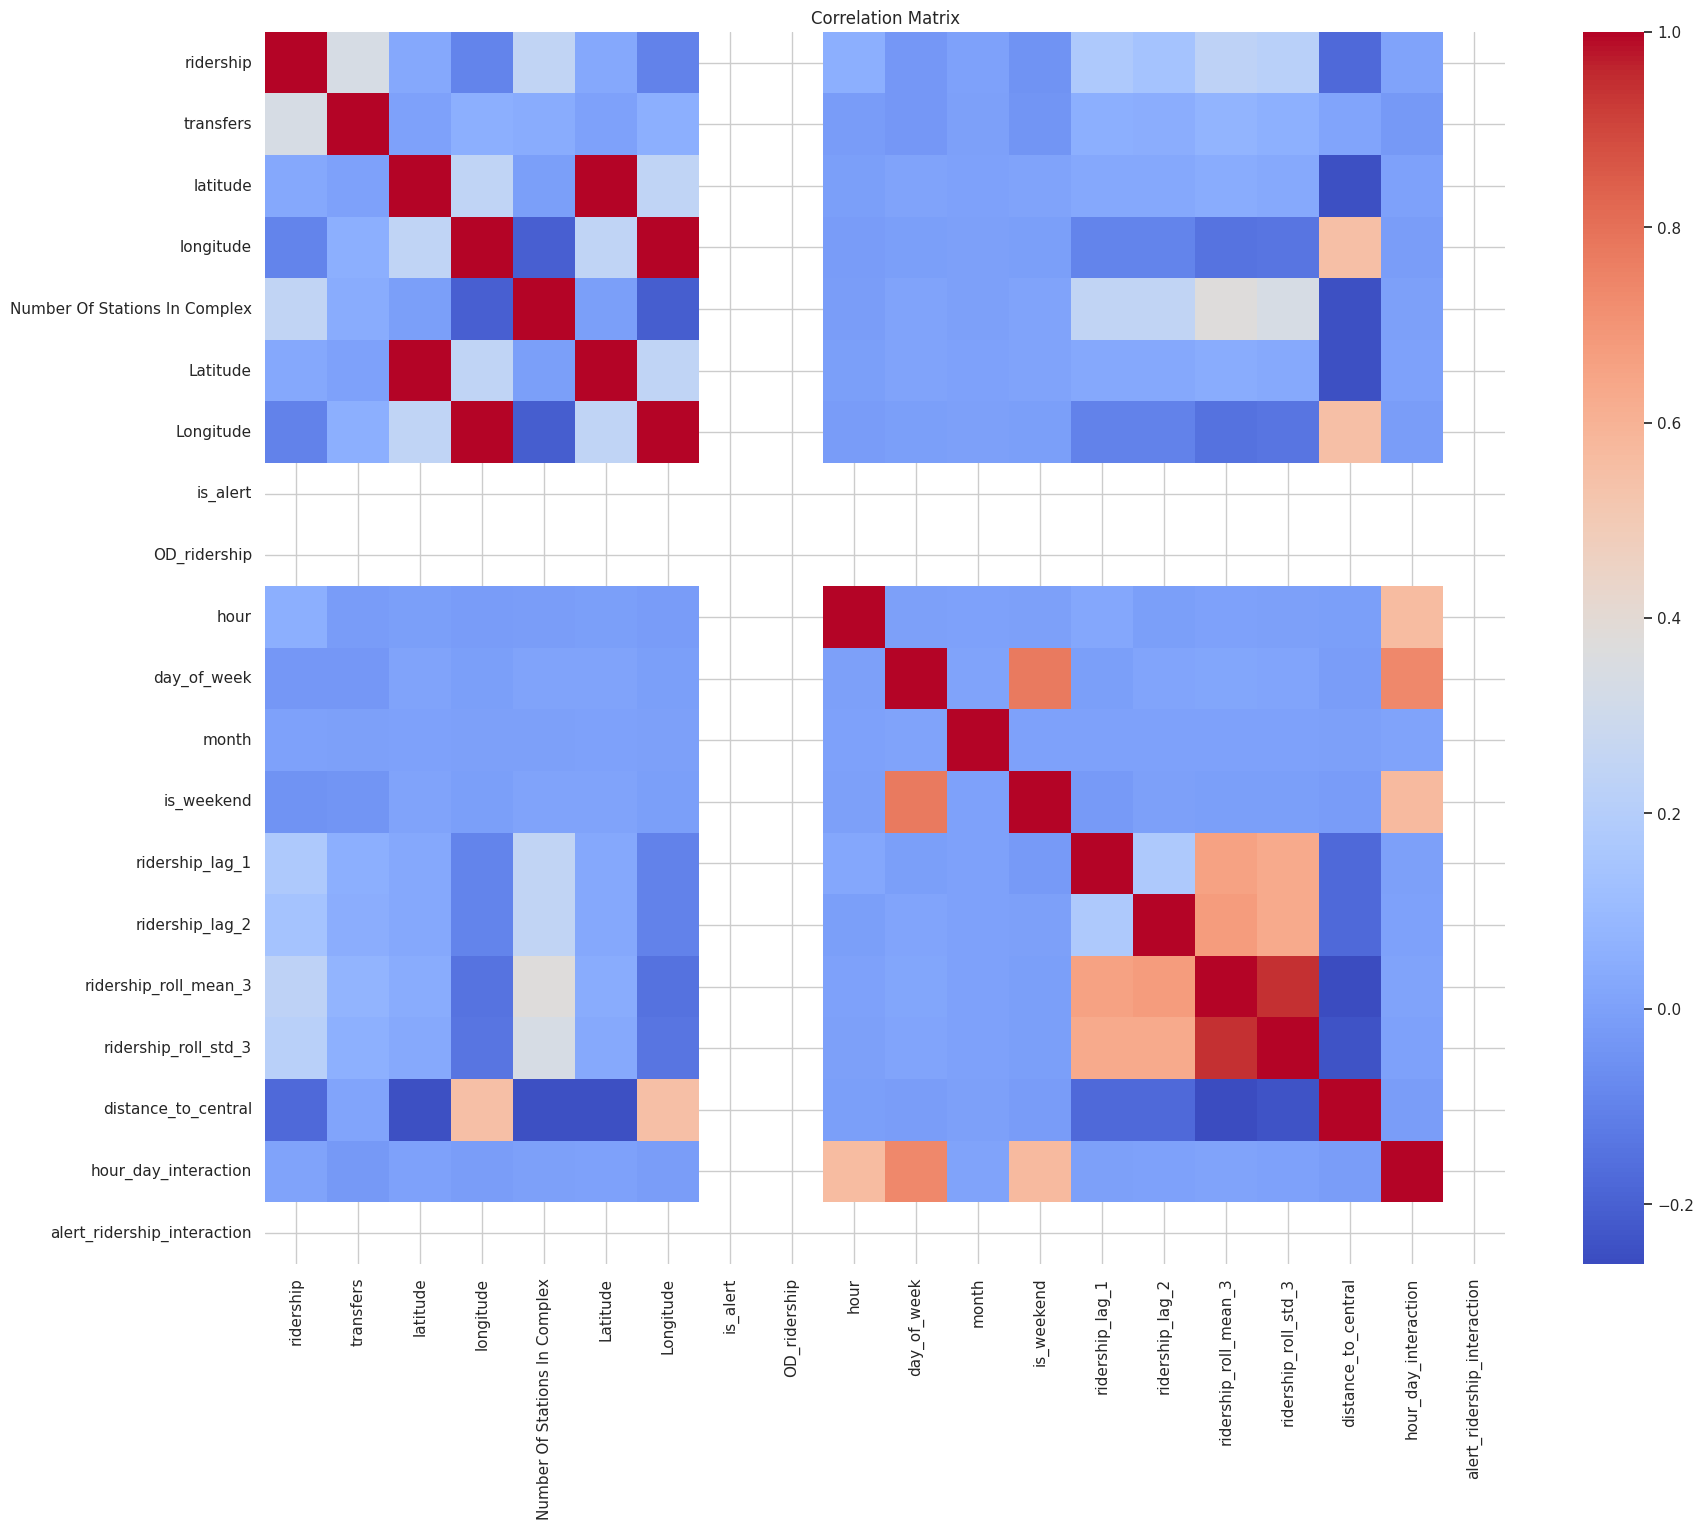

Features to drop due to high correlation: ['Latitude', 'Longitude', 'ridership_roll_std_3']


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


numeric_columns = df_master.select_dtypes(include=[np.number]).columns

corr_matrix = df_master[numeric_columns].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

threshold = 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Features to drop due to high correlation: {to_drop}")

df_master.drop(columns=to_drop, inplace=True)

In [33]:
from sklearn.model_selection import train_test_split


df_master.sort_values(by='transit_timestamp', inplace=True)

X = df_master.drop(['ridership', 'transit_timestamp'], axis=1)
y = df_master['ridership']

split_ratio = 0.9
split_index = int(len(df_master) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (949287, 39), (949287,)
Testing set: (105477, 39), (105477,)


In [34]:
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


/tmp/ipykernel_30/3533430284.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16078184 -0.16078184 -0.16078184 ... -0.06396301 -0.16078184
 -0.16078184]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
/tmp/ipykernel_30/3533430284.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.58751072 -0.58751072 -0.58751072 ... -0.58751072 -0.58751072
 -0.58751072]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
/tmp/ipykernel_30/3533430284.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16078184 -0.16078184 -

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))


xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",   
    tree_method="gpu_hist",         
    predictor="gpu_predictor",      
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=100
)

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:21:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used

[0]	validation_0-rmse:121.61936
[100]	validation_0-rmse:60.42497
[200]	validation_0-rmse:54.51713
[300]	validation_0-rmse:51.47237
[400]	validation_0-rmse:49.54082
[500]	validation_0-rmse:47.96799
[600]	validation_0-rmse:46.88156
[700]	validation_0-rmse:45.78918
[800]	validation_0-rmse:45.10907
[900]	validation_0-rmse:44.52540
[999]	validation_0-rmse:43.95883


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:21:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:21:23] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost MAE: 14.9605
XGBoost RMSE: 43.9588


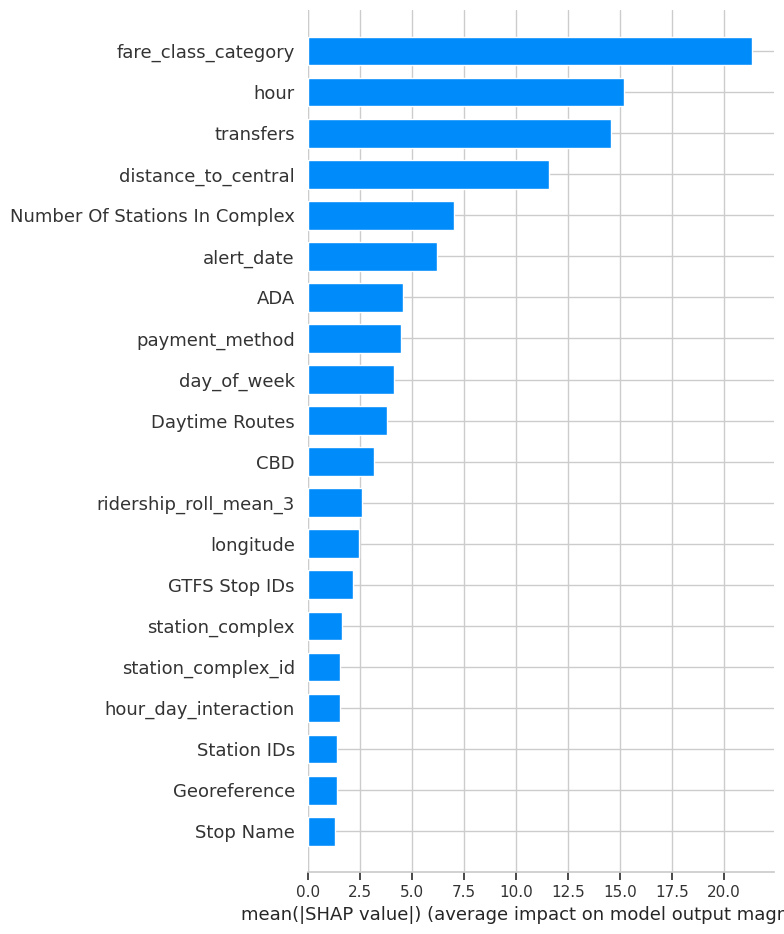

In [36]:
import shap

explainer = shap.TreeExplainer(xgb_model)  
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb


from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) 

tscv = TimeSeriesSplit(n_splits=5)


for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}")

    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        tree_method="gpu_hist",
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    )

    model.fit(X_train_cv, y_train_cv, eval_set=[(X_test_cv, y_test_cv)],
              eval_metric="rmse", early_stopping_rounds=50, verbose=100)

    y_pred_cv = model.predict(X_test_cv)
    mae = mean_absolute_error(y_test_cv, y_pred_cv)
    rmse = mean_squared_error(y_test_cv, y_pred_cv, squared=False)

    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")


Fold 1
[0]	validation_0-rmse:1.50050


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[22:21:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:1.27155
[200]	validation_0-rmse:1.21852
[300]	validation_0-rmse:1.20448
[400]	validation_0-rmse:1.19633
[499]	validation_0-rmse:1.19440
MAE: 0.8827, RMSE: 1.1938

Fold 2
[0]	validation_0-rmse:1.11604


[22:21:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[22:21:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.59672
[200]	validation_0-rmse:0.59376
[300]	validation_0-rmse:0.59073
[338]	validation_0-rmse:0.59140
MAE: 0.4201, RMSE: 0.5906

Fold 3
[0]	validation_0-rmse:1.01417


[22:21:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[22:21:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.61791
[125]	validation_0-rmse:0.61953
MAE: 0.4174, RMSE: 0.6168

Fold 4
[0]	validation_0-rmse:1.21669


[22:21:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[22:21:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.83470
[136]	validation_0-rmse:0.83392
MAE: 0.5791, RMSE: 0.8289

Fold 5
[0]	validation_0-rmse:1.12879


[22:21:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[22:21:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.57861
[200]	validation_0-rmse:0.55902
[300]	validation_0-rmse:0.55476
[356]	validation_0-rmse:0.55797
MAE: 0.3865, RMSE: 0.5547



[22:21:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_cv, y_pred_cv)
print(f"XGBoost R²: {r2:.4f}")


XGBoost R²: 0.7727


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


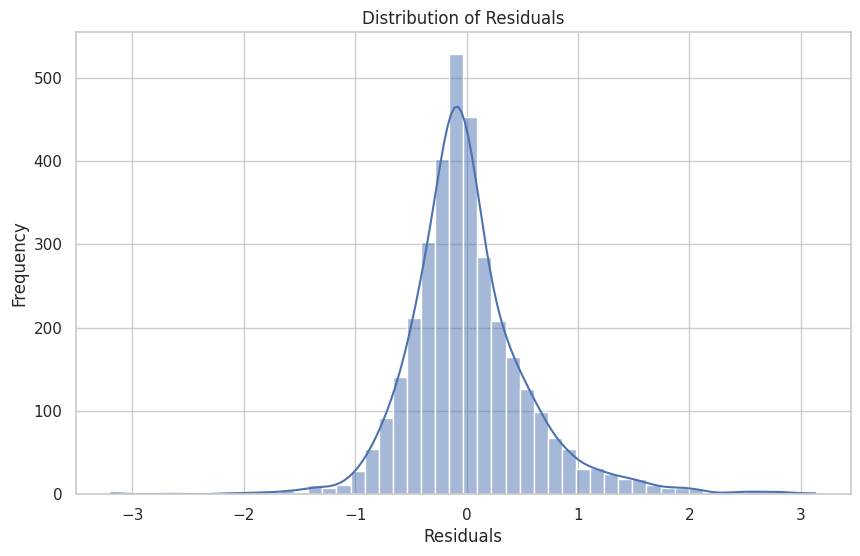

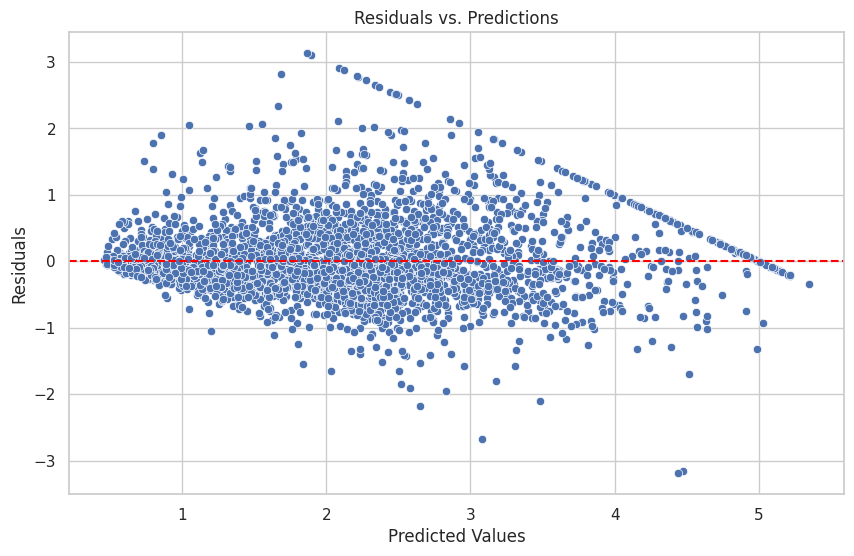

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test_cv - y_pred_cv

plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_cv, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [40]:
import joblib

joblib.dump(xgb_model, '/kaggle/working/xgb_real_time_model.pkl')
print("Model saved successfully!")

loaded_model = joblib.load('/kaggle/working/xgb_real_time_model.pkl')
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!
